#**Neural Network**



## **1. Loading Modules**







In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **2. Importing and Handling Data**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')            # mounting google drive

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/nn_train.csv', delimiter = ',', nrows = 40000)       # reading train set
df1 = df.drop(columns = ['ID', 'binary_label'])
print(df1.shape)

(40000, 1025)




`Dividing Data into Train, CV and Test Set`













In [ ]:
print('TRAIN SET')
print(df1.iloc[:32000])

print()
print()

print('CROSS VALIDATION SET')
print(df1.iloc[32000:36000])

print()
print()

print('TEST SET')
print(df1.iloc[36000:])

TRAIN SET
       Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0             81        109         91         96        107         97   
1            168        168        169        169        170        171   
2             14         20         32          6         27          6   
3             60        109        157        126         82         80   
4             63         72         86         75         93         77   
...          ...        ...        ...        ...        ...        ...   
31995        227        247        241        128         53         95   
31996         80         81         84         87         89         92   
31997          1          0          3          5          0         28   
31998        166        166        166        167        167        167   
31999         25         19         51         43         48         22   

       Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_1016  \
0            103

In [ ]:
df_train = df.iloc[:32000]
df_cv = df.iloc[32000:36000]
df_test = df.iloc[36000:]




`Arranging Train Set as an array`




In [ ]:
features_train = df_train.loc[:, 'Feature_1':'Feature_1024']

x_train = features_train.to_numpy()
y_train = df_train['class_label'].to_numpy()

print(f"x_train = {x_train}")
print()
print(f"y_train = {y_train}")

x_train = [[ 81 109  91 ...  92  78  78]
 [168 168 169 ...  44  44  44]
 [ 14  20  32 ...  48  43  41]
 ...
 [  1   0   3 ...   0   0   0]
 [166 166 166 ... 171 171 171]
 [ 25  19  51 ...  89  89  89]]

y_train = [5 9 5 ... 4 1 5]


`x_train Normalization`

In [ ]:
mean = np.mean(x_train, axis = 0)
std = np.std(x_train, axis = 0)

x_train = (x_train - mean) / std

print(f"Normalized x_train = {x_train}")

Normalized x_train = [[-0.50496428 -0.10820463 -0.39266929 ... -0.3347771  -0.5586081
  -0.54296581]
 [ 0.75055437  0.75525912  0.75549863 ... -1.16782985 -1.14496919
  -1.12056304]
 [-1.47185795 -1.41071774 -1.26115527 ... -1.09840878 -1.16221511
  -1.1715275 ]
 ...
 [-1.65946419 -1.70341731 -1.68803822 ... -1.93146152 -1.90378942
  -1.8680418 ]
 [ 0.72169187  0.72598916  0.71133832 ...  1.03628887  1.04526194
   1.03693248]
 [-1.31311421 -1.42535272 -0.98147335 ... -0.3868429  -0.36890304
  -0.35609612]]


## **3. Visualising the Data**

In [ ]:
Class_1 = np.sum(y_train == 1)
Class_2 = np.sum(y_train == 2)
Class_3 = np.sum(y_train == 3)
Class_4 = np.sum(y_train == 4)
Class_5 = np.sum(y_train == 5)
Class_6 = np.sum(y_train == 6)
Class_7 = np.sum(y_train == 7)
Class_8 = np.sum(y_train == 8)
Class_9 = np.sum(y_train == 9)
Class_10 = np.sum(y_train == 10)

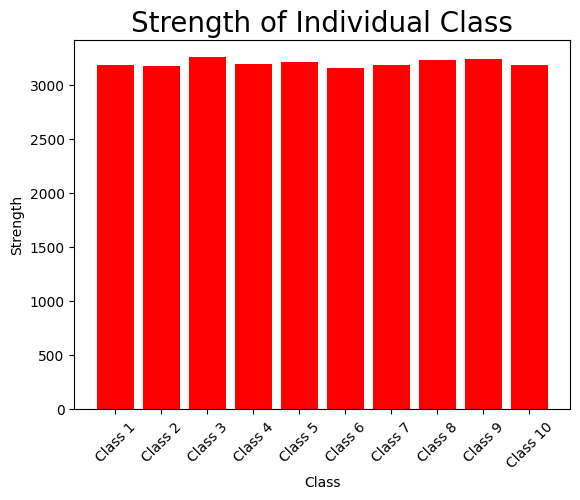

In [ ]:
Category = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9', 'Class 10']
Value = [Class_1, Class_2, Class_3, Class_4, Class_5, Class_6, Class_7, Class_8, Class_9, Class_10]

plt.bar(Category, Value, color = 'red')
plt.title('Strength of Individual Class', fontdict = {'fontsize' : 20})
plt.xlabel('Class')
plt.ylabel('Strength')

plt.xticks(rotation=45)
plt.show()

##**4. Model Initialization**

In [ ]:
m = x_train.shape[0]
n = x_train.shape[1]

## **Defining Softmax Function**

In [ ]:
def softmax(z):
  e_z = np.exp(z - np.max(z, axis=1, keepdims=True))
  return e_z / e_z.sum(axis=1, keepdims=True)

## **Defining ReLU Function**

In [ ]:
def relu(z):
  return np.maximum(0, z)

## **Forward Propogation**

In [ ]:
def forward_prop(x, w1, b1, w2, b2, w3, b3, w4, b4):

  z1 = np.matmul(x, w1) + b1
  a1 = relu(z1)

  z2 = np.matmul(a1, w2) + b2
  a2 = relu(z2)

  z3 = np.matmul(a2, w3) + b3
  a3 = relu(z3)

  z4 = np.matmul(a3, w4) + b4
  a4 = softmax(z4)

  return a1, a2, a3, a4, z1, z2, z3, z4

SyntaxError: invalid syntax (<ipython-input-1-194403540cbc>, line 14)

## **Defining Cost Function**

In [ ]:
def cost(y_true, y_pred):
  m = y_true.shape[0]
  y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)

  cost = -np.sum(y_true * np.log(y_pred)) / m
  return cost                                                           # cost function

## **5. Backward Propogation**

`Backward Propogation`

In [ ]:
def backprop(x, y_true, w1, b1, w2, b2, w3, b3, w4, b4, a1, a2, a3, a4, z1, z2, z3, z4, learning_rate):
  m = x.shape[0]


  dz4 = a4 - y_true
  dw4 = np.matmul(a3.T, dz4) / m
  db4 = np.sum(dz4, axis=0, keepdims=True) / m


  dz3 = np.matmul(dz4, w4.T) * (z3 > 0).astype(float)
  dw3 = np.matmul(a2.T, dz3) / m
  db3 = np.sum(dz3, axis=0, keepdims=True) / m


  dz2 = np.matmul(dz3, w3.T) * (z2 > 0).astype(float)
  dw2 = np.matmul(a1.T, dz2) / m
  db2 = np.sum(dz2, axis=0, keepdims=True) / m


  dz1 = np.matmul(dz2, w2.T) * (z1 > 0).astype(float)
  dw1 = np.matmul(x.T, dz1) / m
  db1 = np.sum(dz1, axis=0, keepdims=True) / m

  return dw1, db1, dw2, db2, dw3, db3, dw4, db4

## **6. Defining Gradient Descent**

In [ ]:
y_train_encoded = np.eye(10)[y_train - 1]

`Gradient Descent`

In [ ]:
def gradient_descent(x_train, y_train, w1, b1, w2, b2, w3, b3, w4, b4, alpha, num_iters):

  J_history = []

  for i in range(num_iters):

    a1, a2, a3, a4, z1, z2, z3, z4 = forward_prop(x_train, w1, b1, w2, b2, w3, b3, w4, b4)

    dw1, db1, dw2, db2, dw3, db3, dw4, db4 = backprop(x_train, y_train_encoded, w1, b1, w2, b2, w3, b3, w4, b4, a1, a2, a3, a4, z1, z2, z3, z4, alpha)

    w1 -= alpha * dw1
    b1 -= alpha * db1
    w2 -= alpha * dw2
    b2 -= alpha * db2
    w3 -= alpha * dw3
    b3 -= alpha * db3
    w4 -= alpha * dw4
    b4 -= alpha * db4

    if i < 100000:
      J_history.append(cost(y_train_encoded, a4))       # storing cost with every iteration for
                                                        # plotting later.
    if i % (num_iters//10) == 0:
      print(f"Epochs {i:6}/{epochs} : Cost {J_history[-1] :8.4f} ")

  return w1, b1, w2, b2, w3, b3, w4, b4, J_history

In [ ]:
w1_int = np.random.randn(1024, 50) * 0.01
b1_int = np.zeros((1, 50))
w2_int = np.random.randn(50, 25) * 0.01
b2_int = np.zeros((1, 25))
w3_int = np.random.randn(25, 12) * 0.01
b3_int = np.zeros((1, 12))
w4_int = np.random.randn(12, 10) * 0.01
b4_int = np.zeros((1, 10))

In [ ]:
epochs = 2000
tmp_alpha = 0.1                                 # learning rate

In [ ]:
%time

w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_hist = gradient_descent(x_train ,y_train, w1_int, b1_int, w2_int, b2_int, w3_int, b3_int, w4_int, b4_int,
                                                                                        tmp_alpha, epochs)


print(f"TRAIN COST estimated is ={J_hist[-1] : 8.4f}")

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
Epochs      0/2000 : Cost   2.3026 
Epochs    200/2000 : Cost   2.3025 
Epochs    400/2000 : Cost   2.3025 
Epochs    600/2000 : Cost   2.3025 
Epochs    800/2000 : Cost   2.3025 
Epochs   1000/2000 : Cost   2.3025 
Epochs   1200/2000 : Cost   2.3025 
Epochs   1400/2000 : Cost   2.3025 
Epochs   1600/2000 : Cost   2.3025 
Epochs   1800/2000 : Cost   2.3025 
TRAIN COST estimated is =  2.3025


`Learning Curve (first batch)`

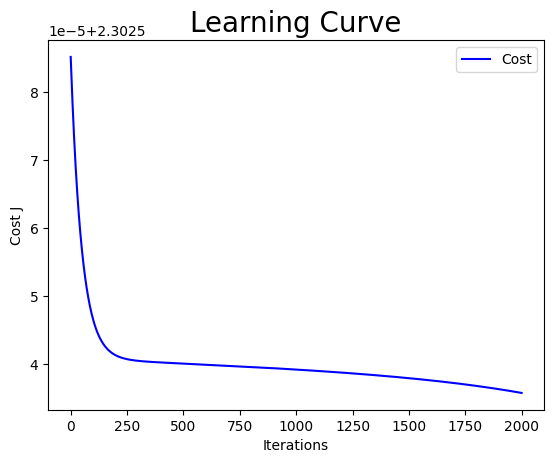

In [ ]:
plt.plot(np.arange(len(J_hist)), J_hist, 'b', label = 'Cost')
plt.title('Learning Curve', fontdict = {'fontsize' : 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')

plt.legend()

plt.show()

`Gradient Descent Continued`

In [ ]:
%time
epochs = 8000
tmp_alpha = 0.03
w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_hist_1 = gradient_descent(x_train, y_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin,
                                                                                                     tmp_alpha, epochs)

print(f"TRAIN COST estimated is ={J_hist_1[-1] : 8.4f}")

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
Epochs      0/8000 : Cost   2.3025 
Epochs    800/8000 : Cost   2.3025 
Epochs   1600/8000 : Cost   2.3025 
Epochs   2400/8000 : Cost   2.3025 
Epochs   3200/8000 : Cost   2.3025 
Epochs   4000/8000 : Cost   2.3025 
Epochs   4800/8000 : Cost   2.3025 
Epochs   5600/8000 : Cost   2.3024 
Epochs   6400/8000 : Cost   2.3022 
Epochs   7200/8000 : Cost   2.3003 
TRAIN COST estimated is =  2.1868


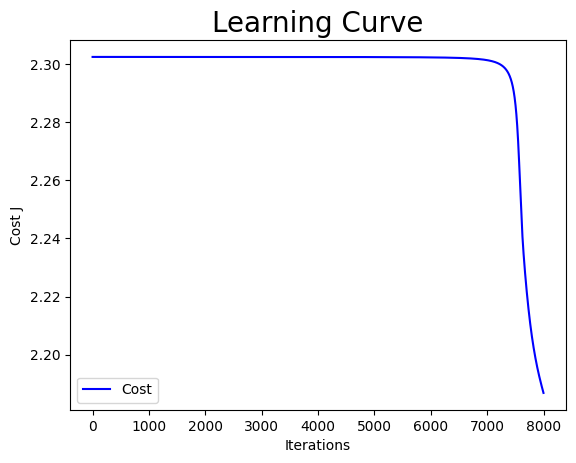

In [ ]:
plt.plot(np.arange(len(J_hist_1)), J_hist_1, 'b', label='Cost')
plt.title('Learning Curve', fontdict={'fontsize': 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.legend()
plt.show()

`Gradient Descent Continued`

In [ ]:
epochs = 10000
tmp_alpha = 0.001                                 # learning rate

In [ ]:
%time
w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_hist_2 = gradient_descent(x_train, y_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin,
                                                                                                  tmp_alpha, epochs)



print(f"TRAIN COST estimated of second batch is ={J_hist_2[-1] : 8.4f}")

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
Epochs      0/10000 : Cost   2.1867 
Epochs   1000/10000 : Cost   2.1844 
Epochs   2000/10000 : Cost   2.1822 
Epochs   3000/10000 : Cost   2.1799 
Epochs   4000/10000 : Cost   2.1777 
Epochs   5000/10000 : Cost   2.1753 
Epochs   6000/10000 : Cost   2.1729 
Epochs   7000/10000 : Cost   2.1702 
Epochs   8000/10000 : Cost   2.1672 
Epochs   9000/10000 : Cost   2.1640 
TRAIN COST estimated of second batch is =  2.1603


`Learning Curve (Batch 2)`

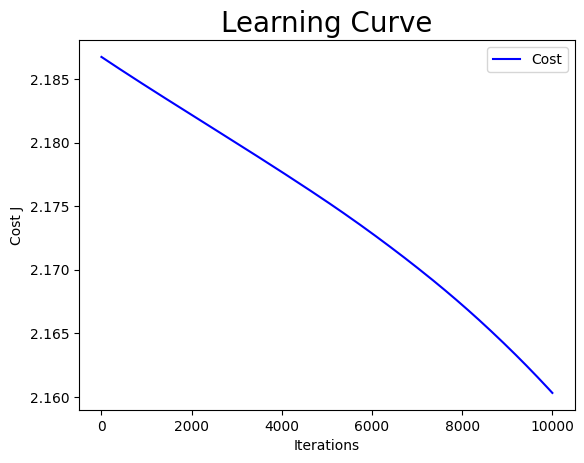

In [ ]:
plt.plot(np.arange(len(J_hist_2)), J_hist_2, 'b', label='Cost')
plt.title('Learning Curve', fontdict={'fontsize': 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.legend()
plt.show()

`Gradient Descent Continued`

In [ ]:
%time
epochs = 10000
tmp_alpha = 0.003
w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_hist_3 = gradient_descent(x_train, y_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin,
                                                                                                     tmp_alpha, epochs)

print(f"TRAIN COST estimated is ={J_hist_3[-1] : 8.4f}")

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.34 µs
Epochs      0/10000 : Cost   2.1587 
Epochs   1000/10000 : Cost   2.1439 
Epochs   2000/10000 : Cost   2.1240 
Epochs   3000/10000 : Cost   2.1006 
Epochs   4000/10000 : Cost   2.0778 
Epochs   5000/10000 : Cost   2.0554 
Epochs   6000/10000 : Cost   2.0337 
Epochs   7000/10000 : Cost   2.0134 
Epochs   8000/10000 : Cost   1.9949 
Epochs   9000/10000 : Cost   1.9784 
TRAIN COST estimated is =  1.9633


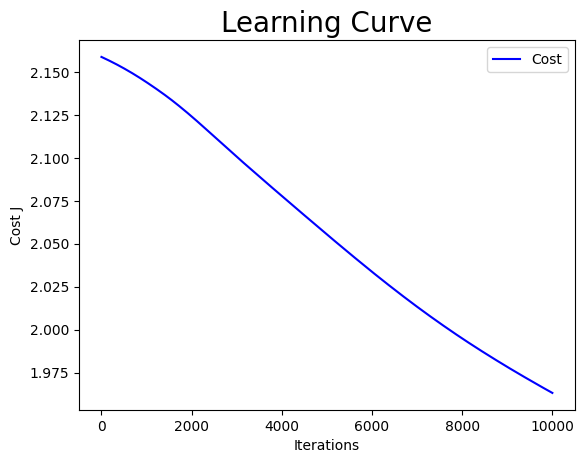

In [ ]:
plt.plot(np.arange(len(J_hist_3)), J_hist_3, 'b', label='Cost')
plt.title('Learning Curve', fontdict={'fontsize': 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.legend()
plt.show()

`Gradient Descent Continued`

In [ ]:
epochs = 5000
tmp_alpha = 0.01                                 # learning rate

In [ ]:
%time
w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_hist_4 = gradient_descent(x_train, y_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin,
                                                                                                  tmp_alpha, epochs)



print(f"TRAIN COST estimated of second batch is ={J_hist_4[-1] : 8.4f}")

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 26.5 µs
Epochs      0/5000 : Cost   1.9633 
Epochs    500/5000 : Cost   1.9394 
Epochs   1000/5000 : Cost   1.9138 
Epochs   1500/5000 : Cost   1.8852 
Epochs   2000/5000 : Cost   1.8560 
Epochs   2500/5000 : Cost   1.8271 
Epochs   3000/5000 : Cost   1.7990 
Epochs   3500/5000 : Cost   1.7717 
Epochs   4000/5000 : Cost   1.7447 
Epochs   4500/5000 : Cost   1.7170 
TRAIN COST estimated of second batch is =  1.6889


`Learning Curve`

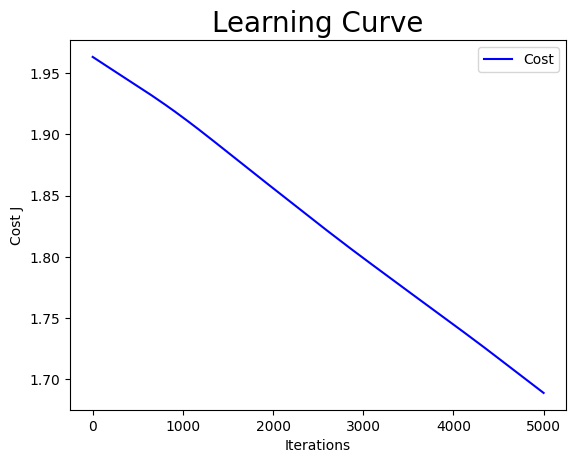

In [ ]:
plt.plot(np.arange(len(J_hist_4)), J_hist_4, 'b', label='Cost')
plt.title('Learning Curve', fontdict={'fontsize': 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.legend()
plt.show()

`Gradient Descent`

In [ ]:
epochs = 5000
tmp_alpha = 0.03

In [ ]:
%time
w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_hist_5 = gradient_descent(x_train, y_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin,
                                                                                                  tmp_alpha, epochs)



print(f"TRAIN COST estimated of fourth batch is ={J_hist_5[-1] : 8.4f}")

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs
Epochs      0/5000 : Cost   1.6888 
Epochs    500/5000 : Cost   1.6864 
Epochs   1000/5000 : Cost   1.6495 
Epochs   1500/5000 : Cost   1.5940 
Epochs   2000/5000 : Cost   1.5596 
Epochs   2500/5000 : Cost   1.4923 
Epochs   3000/5000 : Cost   1.4453 
Epochs   3500/5000 : Cost   1.3994 
Epochs   4000/5000 : Cost   1.4281 
Epochs   4500/5000 : Cost   1.3781 
TRAIN COST estimated of fourth batch is =  1.4827


`Learning Curve`

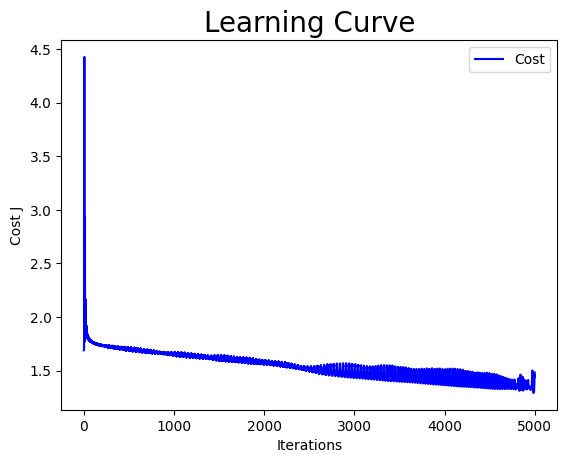

In [ ]:
plt.plot(np.arange(len(J_hist_5)), J_hist_5, 'b', label='Cost')
plt.title('Learning Curve', fontdict={'fontsize': 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.legend()
plt.show()

`Saved Progress`

In [ ]:
# df = pd.DataFrame(w1_fin)
# df.to_csv('/content/drive/MyDrive/w1.csv', index=False)
# df = pd.DataFrame(b1_fin)
# df.to_csv('/content/drive/MyDrive/b1.csv', index=False)
# df = pd.DataFrame(w2_fin)
# df.to_csv('/content/drive/MyDrive/w2.csv', index=False)
# df = pd.DataFrame(b2_fin)
# df.to_csv('/content/drive/MyDrive/b2.csv', index=False)
# df = pd.DataFrame(w3_fin)
# df.to_csv('/content/drive/MyDrive/w3.csv', index=False)
# df = pd.DataFrame(b3_fin)
# df.to_csv('/content/drive/MyDrive/b3.csv', index=False)
# df = pd.DataFrame(w4_fin)
# df.to_csv('/content/drive/MyDrive/w4.csv', index=False)
# df = pd.DataFrame(b4_fin)
# df.to_csv('/content/drive/MyDrive/b4.csv', index=False)

##**7. Gradient Descent of Second Batch**

`Reading Batch 2`

In [ ]:
df_batch2 = pd.read_csv('/content/drive/MyDrive/nn_train.csv', delimiter=',', skiprows=40000, nrows=40000)

df_train = df_batch2.iloc[:32000]
df_cv = df_batch2.iloc[32000:36000]
df_test = df_batch2.iloc[36000:]

features_batch2 = df_train.iloc[:, 1:1025]

x_train = features_batch2.to_numpy()
y_train = df_train.iloc[:, 1026].to_numpy()


x_train = (x_train - mean) / std                                 # same normalization

print(f"x_next_batch = {x_train}")
print(f"y_next_batch = {y_train}")

x_next_batch = [[-1.12550798 -1.23509799 -1.15811456 ... -0.26535604 -0.40339487
  -0.50898951]
 [ 1.44325431  1.45773809  1.41790319 ... -1.75790887 -1.66234662
  -1.54526688]
 [ 0.63510438  0.15522499  0.12253426 ...  0.23794666  0.20021213
   0.47632341]
 ...
 [ 0.05785443  0.2137649   0.4610966  ...  0.79331515  1.07975377
   1.25777848]
 [ 0.54851689  0.33084473  0.29917548 ...  1.00157833  1.01077011
   1.00295618]
 [-0.63484552 -0.64969884 -0.67235121 ...  1.24455205  1.25221291
   1.22380217]]
y_next_batch = [5 9 7 ... 5 1 3]


`Gradient Descent`

In [ ]:
epochs = 10000
tmp_alpha = 0.2

In [ ]:
%time
w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_hist2 = gradient_descent(x_train, y_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin,
                                                                                                  tmp_alpha, epochs)



print(f"TRAIN COST estimated is ={J_hist2[-1] : 8.4f}")

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.11 µs
Epochs      0/10000 : Cost   3.1556 
Epochs   1000/10000 : Cost   2.2935 
Epochs   2000/10000 : Cost   2.2419 
Epochs   3000/10000 : Cost   2.1493 
Epochs   4000/10000 : Cost   2.1258 
Epochs   5000/10000 : Cost   2.0228 
Epochs   6000/10000 : Cost   1.9334 
Epochs   7000/10000 : Cost   1.8741 
Epochs   8000/10000 : Cost   1.8477 
Epochs   9000/10000 : Cost   1.7732 
TRAIN COST estimated is =  1.7715


`Learning Curve`

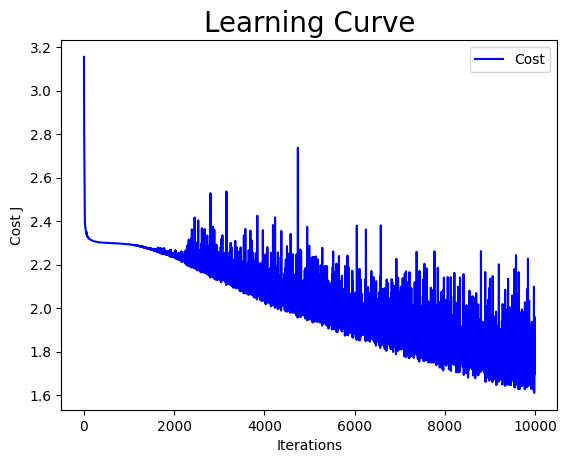

In [ ]:
plt.plot(np.arange(len(J_hist2)), J_hist2, 'b', label='Cost')
plt.title('Learning Curve', fontdict={'fontsize': 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.legend()
plt.show()

`Gradient Descent`

In [ ]:
epochs = 5000
tmp_alpha = 0.008

In [ ]:
%time
w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_hist2_1 = gradient_descent(x_train, y_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin,
                                                                                                  tmp_alpha, epochs)



print(f"TRAIN COST estimated of seventh batch is ={J_hist2_1[-1] : 8.4f}")

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 15 µs
Epochs      0/5000 : Cost   1.7306 
Epochs    500/5000 : Cost   1.5626 
Epochs   1000/5000 : Cost   1.5519 
Epochs   1500/5000 : Cost   1.5436 
Epochs   2000/5000 : Cost   1.5364 
Epochs   2500/5000 : Cost   1.5299 
Epochs   3000/5000 : Cost   1.5240 
Epochs   3500/5000 : Cost   1.5184 
Epochs   4000/5000 : Cost   1.5131 
Epochs   4500/5000 : Cost   1.5080 
TRAIN COST estimated of seventh batch is =  1.5031


`Learning Curve`

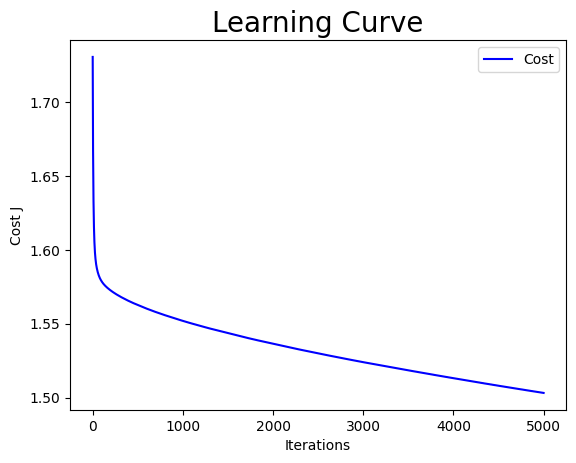

In [ ]:
plt.plot(np.arange(len(J_hist2_1)), J_hist2_1, 'b', label='Cost')
plt.title('Learning Curve', fontdict={'fontsize': 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.legend()
plt.show()

`Gradient Descent`

In [ ]:
epochs = 5000
tmp_alpha = 0.003

In [ ]:
%time
w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_hist2_2 = gradient_descent(x_train, y_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin,
                                                                                                  tmp_alpha, epochs)



print(f"TRAIN COST estimated is ={J_hist2_2[-1] : 8.4f}")

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs
Epochs      0/5000 : Cost   1.5031 
Epochs    500/5000 : Cost   1.5013 
Epochs   1000/5000 : Cost   1.4995 
Epochs   1500/5000 : Cost   1.4978 
Epochs   2000/5000 : Cost   1.4961 
Epochs   2500/5000 : Cost   1.4944 
Epochs   3000/5000 : Cost   1.4927 
Epochs   3500/5000 : Cost   1.4911 
Epochs   4000/5000 : Cost   1.4894 
Epochs   4500/5000 : Cost   1.4878 
TRAIN COST estimated is =  1.4862


`Learning Curve`

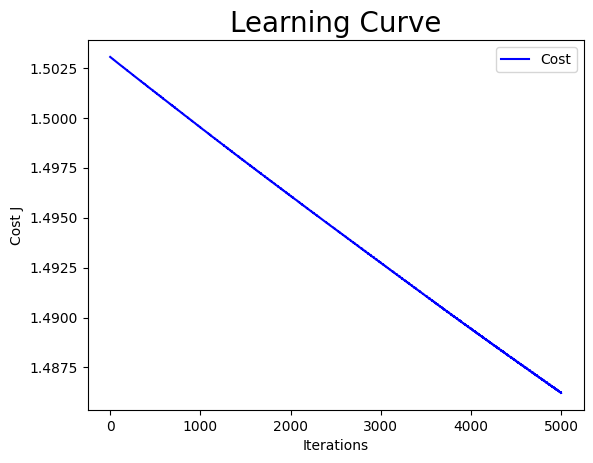

In [ ]:
plt.plot(np.arange(len(J_hist2_2)), J_hist2_2, 'b', label='Cost')
plt.title('Learning Curve', fontdict={'fontsize': 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.legend()
plt.show()

`Gradient Descent`

In [ ]:
epochs = 5000
tmp_alpha = 0.003

In [ ]:
%time
w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_hist2_3 = gradient_descent(x_train, y_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin,
                                                                                                  tmp_alpha, epochs)



print(f"TRAIN COST estimated is ={J_hist2_3[-1] : 8.4f}")

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 63.9 µs
Epochs      0/5000 : Cost   1.4862 
Epochs    500/5000 : Cost   1.4846 
Epochs   1000/5000 : Cost   1.4831 
Epochs   1500/5000 : Cost   1.4815 
Epochs   2000/5000 : Cost   1.4800 
Epochs   2500/5000 : Cost   1.4784 
Epochs   3000/5000 : Cost   1.4769 
Epochs   3500/5000 : Cost   1.4754 
Epochs   4000/5000 : Cost   1.4739 
Epochs   4500/5000 : Cost   1.4725 
TRAIN COST estimated is =  1.4710


`Learning Curve`

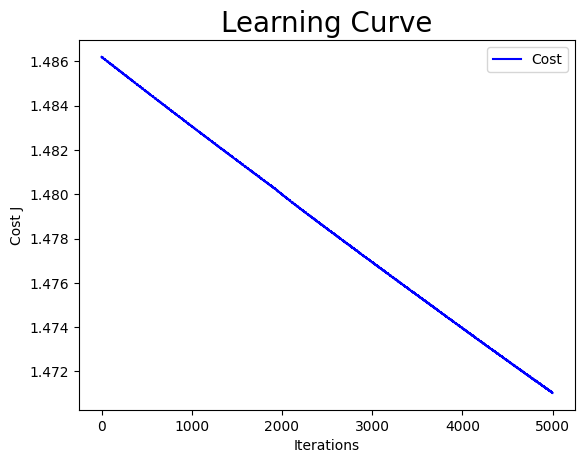

In [ ]:
plt.plot(np.arange(len(J_hist2_3)), J_hist2_3, 'b', label='Cost')
plt.title('Learning Curve', fontdict={'fontsize': 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.legend()
plt.show()

`Gradient Descent`

In [ ]:
epochs = 10000
tmp_alpha = 0.008

In [ ]:
%time
w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_hist2_4 = gradient_descent(x_train, y_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin,
                                                                                                  tmp_alpha, epochs)



print(f"TRAIN COST estimated is ={J_hist2_4[-1] : 8.4f}")

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.2 µs
Epochs      0/10000 : Cost   1.4585 
Epochs   1000/10000 : Cost   1.4514 
Epochs   2000/10000 : Cost   1.4445 
Epochs   3000/10000 : Cost   1.4378 
Epochs   4000/10000 : Cost   1.4312 
Epochs   5000/10000 : Cost   1.4247 
Epochs   6000/10000 : Cost   1.4185 
Epochs   7000/10000 : Cost   1.4124 
Epochs   8000/10000 : Cost   1.4064 
Epochs   9000/10000 : Cost   1.4004 
TRAIN COST estimated is =  1.3946


`Learning Curve`

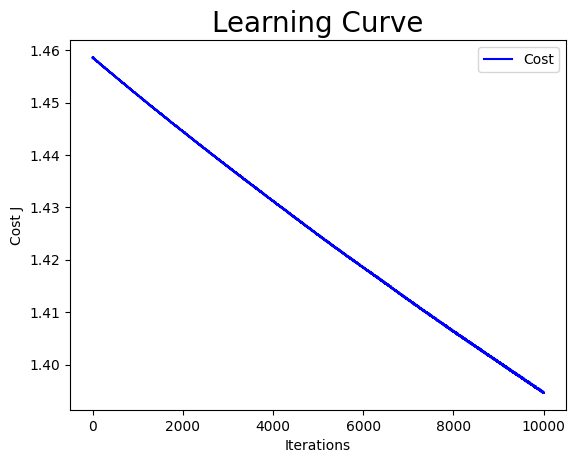

In [ ]:
plt.plot(np.arange(len(J_hist2_4)), J_hist2_4, 'b', label='Cost')
plt.title('Learning Curve', fontdict={'fontsize': 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.legend()
plt.show()

##**8. Learned Parameters**

In [ ]:
print(f'Obtained weights = {w1_fin}' )
print(f'{w2_fin}' )
print(f'{w3_fin}' )
print(f'{w4_fin}' )
print()
print(f'Obtained bias terms = {b1_fin}')
print(f'{b2_fin}')
print(f'{b3_fin}')
print(f'{b4_fin}')

Obtained weights = [[ 0.04727096  0.13230706  0.04619662 ...  0.04922435 -0.08818508
  -0.18547179]
 [ 0.18454361  0.07260096 -0.02347886 ... -0.02176473 -0.09085561
  -0.22508825]
 [ 0.13157102  0.1236751   0.06619608 ... -0.08471827  0.11104194
  -0.16241756]
 ...
 [ 0.02696383 -0.04590471 -0.08955653 ... -0.0844385  -0.09965126
  -0.07092739]
 [ 0.03021825 -0.10541669  0.01005592 ... -0.0608316  -0.10568464
  -0.15883215]
 [ 0.1879252   0.10508341  0.14393314 ... -0.10801539  0.01771268
   0.09869357]]
[[-0.02067229 -0.20033852  0.18695728 ... -0.18753044 -0.10842086
  -0.95429866]
 [-0.07732374 -0.09604859 -0.29866393 ... -0.13119561  0.85996686
  -0.18355239]
 [-0.11956936  0.29268924 -0.27121145 ... -0.00893455 -0.43593046
  -0.57388498]
 ...
 [ 0.04334444 -0.21813873 -0.05367424 ...  0.11933922  0.27472717
   0.027962  ]
 [-0.12792966  0.16695036 -0.09491917 ... -0.20646255 -0.58359141
   0.26291169]
 [-0.17195097  0.08856736 -0.1137445  ... -0.00266428 -0.32100409
  -0.25244163

##**9. Estimating Cross Validation Cost**

`CV Set`




In [ ]:
features_cv = df_cv.iloc[:, 1:1025]

x_cv = features_cv.to_numpy()
y_cv = df_cv.iloc[:, 1026].to_numpy()


`Same Normalization`




In [ ]:
x_cv = (x_cv - mean) / std

print(f"x_cv = {x_cv}")
print(f"y_cv = {y_cv}")

x_cv = [[ 0.69282937  0.71135418  0.72605843 ...  0.67182829  0.64860591
   0.54427603]
 [ 0.50522314  0.60890933  0.65245792 ...  1.0189336   1.42467205
   1.22380217]
 [-0.43280803 -0.41553918 -0.08354716 ... -0.07444812 -0.45513262
  -0.42404874]
 ...
 [ 1.80403554  1.7943426   1.69758512 ... -0.95956666 -1.14496919
  -1.22249196]
 [ 1.48654806  1.51627801  1.57982431 ...  1.38339417  1.45916388
   1.29175479]
 [-1.26982047 -1.29363791 -1.32003568 ...  1.4701705   1.21772108
   1.03693248]]
y_cv = [ 6  8  6 ... 10  8  6]


In [ ]:
m_cv = x_cv.shape[0]
print(m_cv)

4000


`Computing Cross Validation Cost`

In [ ]:
y_cv_encoded = np.eye(10)[y_cv - 1]

a1_cv, a2_cv, a3_cv, a4_cv, z1, z2, z3, z4 = forward_prop(x_cv, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin)
cv_cost = cost(y_cv_encoded, a4_cv)

print(f"CROSS VALIDATION COST estimated is ={cv_cost : 8.4f}")

CROSS VALIDATION COST estimated is =  5.7723


##**10. Estimating Test Cost**

`Test Set`

In [ ]:
features_test = df_test.iloc[:, 1:1025]

x_test = features_test.to_numpy()
y_test = df_test.iloc[:, 1026].to_numpy()

`Same Normalization`

In [ ]:
x_test = (x_test - mean) / std

print(f"x_test = {x_test}")
print(f"y_test = {y_test}")

x_test = [[-8.08020505e-01 -9.42398417e-01 -6.57631113e-01 ... -1.68848781e+00
  -1.85205168e+00 -1.68117211e+00]
 [ 5.62948135e-01  6.08909328e-01  6.52457918e-01 ...  2.55301920e-01
   2.86441704e-01  2.55477412e-01]
 [ 6.92829375e-01  5.21099455e-01 -3.93868515e-02 ...  6.43940006e-02
   4.49989021e-02  3.46314131e-02]
 ...
 [-1.54401420e+00 -1.13265314e+00 -1.02563365e+00 ... -1.65377728e+00
  -1.74857619e+00 -1.46032612e+00]
 [ 1.29430263e-04  9.30878860e-01  1.41790319e+00 ... -4.38908697e-01
  -9.72510047e-01 -5.59953967e-01]
 [-4.31643163e-02 -6.42996937e-02 -5.41069530e-02 ... -1.09158654e-01
   1.82966217e-01  6.12228640e-01]]
y_test = [ 2  9  4 ...  2 10  1]


In [ ]:
m_test = x_test.shape[0]
print(m_test)

4000


`Computing Test Cost`

In [ ]:
y_test_encoded = np.eye(10)[y_test - 1]

a1_test, a2_test, a3_test, a4_test, z1, z2, z3, z4 = forward_prop(x_test, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin)
test_cost = cost(y_test_encoded, a4_test)

print(f"TEST COST estimated is ={test_cost : 8.4f}")

TEST COST estimated is =  5.7864


##**11. Estimating Accuracy**

`Defining Threshold using CV set`

In [ ]:
y_cv_pred = np.argmax(a4_cv, axis=1) + 1

accuracy = np.mean(y_cv_pred == y_cv)
print(f"Cross-validation accuracy: {accuracy * 100}%")

Cross-validation accuracy: 11.575000000000001%


`Accuracy of Test Set Predictions`

In [ ]:
y_test_pred = np.argmax(a4_test, axis=1) + 1

accuracy = np.mean(y_test_pred == y_test)
print(f"Test accuracy: {accuracy * 100}%")

Test accuracy: 11.700000000000001%


`Accuracy of Train Set Predictions`

In [ ]:
a1, a2, a3, a4, z1, z2, z3, z4 = forward_prop(x_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin)

y_train_pred = np.argmax(a4, axis=1) + 1

accuracy = np.mean(y_train_pred == y_train)
print(f"Train accuracy: {accuracy * 100}%")

Train accuracy: 11.55625%


##**12. F1 Score**

`Defining Precision - Recall`

In [ ]:
def precision_recall_multiclass(y_true, y_pred, num_classes):
    precision_per_class = []
    recall_per_class = []
    for i in range(num_classes):
        TP = np.sum((y_true == i + 1) & (y_pred == i + 1))
        FP = np.sum((y_true != i + 1) & (y_pred == i + 1))
        FN = np.sum((y_true == i + 1) & (y_pred != i + 1))
        precision = TP / (TP + FP) if (TP + FP) != 0 else 0.0
        recall = TP / (TP + FN) if (TP + FN) != 0 else 0.0
        precision_per_class.append(precision)
        recall_per_class.append(recall)
    return precision_per_class, recall_per_class

`Precision Recall for CV Set`

In [ ]:
precision_cv, recall_cv = precision_recall_multiclass(y_cv, y_cv_pred, 10)

print("Precision for each class (CV):", precision_cv)
print("Recall for each class (CV):", recall_cv)

macro_precision_cv = np.mean(precision_cv)
macro_recall_cv = np.mean(recall_cv)

print(f"Macro-average Precision (CV): {macro_precision_cv}")
print(f"Macro-average Recall (CV): {macro_recall_cv}")

Precision for each class (CV): [0.06028368794326241, 0.10120481927710843, 0.11235955056179775, 0.14246575342465753, 0.10966057441253264, 0.14465408805031446, 0.13257575757575757, 0.09020618556701031, 0.14992503748125938, 0.10136986301369863]
Recall for each class (CV): [0.04156479217603912, 0.11351351351351352, 0.19801980198019803, 0.12121212121212122, 0.10344827586206896, 0.05542168674698795, 0.085995085995086, 0.09510869565217392, 0.25839793281653745, 0.09135802469135802]
Macro-average Precision (CV): 0.11447053173073991
Macro-average Recall (CV): 0.11640399306460843


`F1 Score`

In [ ]:
F1 = 2 * (macro_precision_cv * macro_recall_cv) / (macro_precision_cv + macro_recall_cv)

print(f"F1 Score = {F1 : 8.4f}")

F1 Score =   0.1154


## **13. Prediction For Test Set**

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/nn_test.csv', delimiter = ',')        # reading test set
df_test = df_test.drop(columns = ['ID'])
print(df_test.shape)

(20000, 1024)


`Test Set`

In [ ]:
features_test = df_test.loc[:, 'Feature_1':'Feature_1024']
x_test = features_test.to_numpy()


print(f"x_test = {x_test}")

x_test = [[ 52  36  23 ...  80  32  30]
 [118 119 120 ...  52  52  52]
 [162 166 171 ...  40  42  43]
 ...
 [255 255 254 ...  61  65  70]
 [ 81  95  95 ... 128 130 132]
 [172 212 160 ... 191 178 186]]


`Same Normalization`

In [ ]:
x_test = (x_test - mean) / std

print(f'x_test = {x_test}')

x_test = [[-0.9234705  -1.17655808 -1.39363619 ... -0.54304029 -1.35192016
  -1.35839719]
 [ 0.02899193  0.03814516  0.03421366 ... -1.02898772 -1.00700188
  -0.98465781]
 [ 0.66396688  0.72598916  0.78493883 ... -1.23725091 -1.17946102
  -1.13755119]
 ...
 [ 2.00607302  2.02850226  2.00670725 ... -0.87279033 -0.78280499
  -0.67887104]
 [-0.50496428 -0.31309433 -0.33378888 ...  0.29001245  0.33817945
   0.37439449]
 [ 0.80827937  1.39919818  0.62301771 ...  1.38339417  1.16598334
   1.29175479]]


`Prediction for Test Set`

In [ ]:
a1_test, a2_test, a3_test, a4_test, z1, z2, z3, z4 = forward_prop(x_test, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin)
y_test_pred = np.argmax(a4_test, axis = 1) + 1

print(f"Predicted labels for x_test: {y_test_pred}")

Predicted labels for x_test: [5 4 9 ... 9 8 2]


`Saved the prediction in Google Drive`

In [ ]:
# df = pd.DataFrame(y_test_pred)
# df.columns = ['Prediction_nn_multiclassification']
# df.to_csv('/content/drive/MyDrive/nn_class_test_prediction.csv', index=False)